# Module 6 Assignment

By Jahnavi Chintakindi

You've been asked to clean and explore a dataset containing employee ratings  for months of review cycles.

Enter your student id, in the next cell, when asked and then run the next two cells. The second cell will create the dataset you will be working on. If you run the second cell again, it will generate a new dataset so be aware.

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, do not edit
import random

# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11711379
my_seed = random.seed(stud_id)

In [ ]:
# run this cell as is, do not edit
import pandas as pd
import numpy as np
import re
import random
import urllib.request
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))

words = []

# "https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/words.txt'

for word in urllib.request.urlopen(url):
    words.append(word.decode('utf-8').replace('\n', ''))

capitalized = [word for word in words if word[0].isupper()]
proper_names  = [word for word in capitalized if not word.isupper()]

variables = []
for n in range(20):
    variables.append(' '.join([proper_names[random.randint(0, len(proper_names))] for i in range(2)]))

print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['blue', 'white']) for i in range(100)]
df['Collar'] = cats
cats = [random.choice(['opt in', 'opt out']) for i in range(100)]
df['401K'] = cats
cats = [random.choice(['medical plan 1', 'medical plan 2', 'medical plan 3']) for i in range(100)]
df['Medical'] = cats
cats = [random.choice(['5 stars', '4 stars', '3 stars', '2 stars', '1 star']) for i in range(100)]
df['Stars'] = cats

df['Total Sales'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('Assgn 6.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['Anton Doris', 'Jr Chomsky', 'Ronald Volstead', 'Josiah Liechtenstein', 'Ott Swanson', 'Hatfield Mullen', 'Shulman Fred', 'Kremlin Knott', 'Buddhism Arcturus', 'Barcelona Westminster', 'Bristol Honolulu', 'Cyril Balzac', 'Salish Georgetown', 'Salem Emil', 'Merriam Culbertson', 'Irene Cruz', 'Vought Middleton', 'Tarbell Albright', 'Mickelson Solomon', 'Sabina Cerberus']


### Data Prep

In [ ]:
# create dataframe from Assgn 6.csv and print shape, info(), and head()
import pandas as pd
import numpy as np

AssignDf =  pd.read_csv("/content/Assgn 6.csv")
print("shape of the data frame is:")
print(AssignDf.shape)
print("Info of the Dataframe is:")
print(AssignDf.info())
print("Head elements:")
AssignDf.head()


shape of the data frame is:
(106, 21)
Info of the Dataframe is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vought Middleton       99 non-null     float64
 1   Mickelson Solomon      99 non-null     float64
 2   Merriam Culbertson     106 non-null    float64
 3   Tarbell Albright       102 non-null    float64
 4   Ott Swanson            106 non-null    float64
 5   Sabina Cerberus        106 non-null    float64
 6   Salish Georgetown      106 non-null    float64
 7   Shulman Fred           106 non-null    float64
 8   Buddhism Arcturus      106 non-null    float64
 9   Barcelona Westminster  106 non-null    int64  
 10  Cyril Balzac           106 non-null    float64
 11  Irene Cruz             106 non-null    int64  
 12  Anton Doris            102 non-null    float64
 13  Salem Emil             106 non-null    float64

,Vought Middleton,Mickelson Solomon,Merriam Culbertson,Tarbell Albright,Ott Swanson,Sabina Cerberus,Salish Georgetown,Shulman Fred,Buddhism Arcturus,Barcelona Westminster,...,Irene Cruz,Anton Doris,Salem Emil,Ronald Volstead,Josiah Liechtenstein,Collar,401K,Medical,Stars,Total Sales
0,-1.002883,0.308944,-0.062415,0.03,0.402138,1.4338,-1.002883,-0.111842,1.4338,7742,...,909,0.572865,0.07,1.154160,-0.570770,white,opt out,medical plan 1,1 star,13.474174
1,-0.193938,0.974193,-1.790682,0.03,-0.399181,-0.9564,-0.193938,-1.033756,-0.9564,8035,...,758,1.878331,0.07,-1.051941,-0.452686,white,opt in,medical plan 3,3 stars,-157.737457
2,1.006350,0.403089,0.566157,0.03,-0.206319,-1.9390,1.006350,0.970454,-1.9390,3989,...,315,0.360126,0.07,-1.291814,NaN,blue,opt out,medical plan 3,4 stars,-38.198459
3,-0.883820,0.660540,-0.038535,NaN,-0.465498,-0.4149,-0.883820,-1.606716,-0.4149,3426,...,342,0.753573,0.07,-2.377359,-1.819114,blue,opt out,medical plan 1,2 stars,-22.589698
4,NaN,0.913729,-0.538726,0.03,0.831869,0.7618,-0.550237,0.931756,0.7618,7044,...,842,1.755627,0.07,0.333011,-1.541936,white,opt in,medical plan 1,1 star,87.609873


In [ ]:
# identify constants
#AssignDf.isna().sum()

Identify_constants = [
    const for const in AssignDf.columns if len(AssignDf[const].fillna(0).unique()) == 1
]

print('Below are the constants:')
print(Identify_constants)

Below are the constants:
['Salem Emil']


In [ ]:
# drop constants
AssignDf.drop(Identify_constants, axis=1, inplace=True)
AssignDf.shape

(106, 20)

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in AssignDf.columns.sort_values():
    if (len(AssignDf[val].unique()) < 3):
        val_counts = AssignDf[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

opt out    0.509434
opt in     0.490566
Name: 401K, dtype: float64
white    0.5
blue     0.5
Name: Collar, dtype: float64
0.03    1.0
Name: Tarbell Albright, dtype: float64
quasi_consts ['Tarbell Albright']


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
print("AssignDf shape before dropping Quasi Constant columns:", AssignDf.shape)
AssignDf.drop(quasi_consts,axis = 1,inplace =True)
print("AssignDf shape after dropping Quasi Constant columns:", AssignDf.shape)
AssignDf.info()

AssignDf shape before dropping Quasi Constant columns: (106, 20)
AssignDf shape after dropping Quasi Constant columns: (106, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vought Middleton       99 non-null     float64
 1   Mickelson Solomon      99 non-null     float64
 2   Merriam Culbertson     106 non-null    float64
 3   Ott Swanson            106 non-null    float64
 4   Sabina Cerberus        106 non-null    float64
 5   Salish Georgetown      106 non-null    float64
 6   Shulman Fred           106 non-null    float64
 7   Buddhism Arcturus      106 non-null    float64
 8   Barcelona Westminster  106 non-null    int64  
 9   Cyril Balzac           106 non-null    float64
 10  Irene Cruz             106 non-null    int64  
 11  Anton Doris            102 non-null    float64
 12  Ronald Volstead        106 non-nu

In [ ]:
# identify duplicate rows
AssignDf[AssignDf.duplicated(keep=False)]

,Vought Middleton,Mickelson Solomon,Merriam Culbertson,Ott Swanson,Sabina Cerberus,Salish Georgetown,Shulman Fred,Buddhism Arcturus,Barcelona Westminster,Cyril Balzac,Irene Cruz,Anton Doris,Ronald Volstead,Josiah Liechtenstein,Collar,401K,Medical,Stars,Total Sales
12,-0.024579,0.413975,-0.057164,1.046689,0.2960,-0.024579,1.415790,0.2960,6210,-0.468930,422,0.655124,-1.823846,-0.035670,white,opt in,medical plan 1,2 stars,-96.318313
18,-0.216630,0.774970,1.152921,1.057993,-0.0348,-0.216630,0.041329,-0.0348,1740,0.260830,874,1.232763,-0.255569,-0.634254,white,opt out,medical plan 2,1 star,-83.382512
30,-0.216630,0.774970,1.152921,1.057993,-0.0348,-0.216630,0.041329,-0.0348,1740,0.260830,874,1.232763,-0.255569,-0.634254,white,opt out,medical plan 2,1 star,-83.382512
32,NaN,0.589173,-0.702341,-0.710005,0.0307,-1.150020,-0.590644,0.0307,9492,-1.228616,764,NaN,-1.417075,-0.383145,blue,opt out,medical plan 2,2 stars,-13.573369
48,NaN,0.589173,-0.702341,-0.710005,0.0307,-1.150020,-0.590644,0.0307,9492,-1.228616,764,NaN,-1.417075,-0.383145,blue,opt out,medical plan 2,2 stars,-13.573369
50,-0.671552,0.773455,1.985295,0.222528,-0.9595,-0.671552,-1.259974,-0.9595,6755,-0.501001,685,0.228871,-1.448332,-0.164084,white,opt in,medical plan 1,5 stars,-58.140515
52,0.050667,0.568716,-0.717166,1.339629,-0.8892,0.050667,-1.046723,-0.8892,5019,-0.417291,608,0.698447,-0.247160,-0.980339,blue,opt out,medical plan 2,1 star,-59.886306
64,0.050667,0.568716,-0.717166,1.339629,-0.8892,0.050667,-1.046723,-0.8892,5019,-0.417291,608,0.698447,-0.247160,-0.980339,blue,opt out,medical plan 2,1 star,-59.886306
66,-0.024579,0.413975,-0.057164,1.046689,0.2960,-0.024579,1.415790,0.2960,6210,-0.468930,422,0.655124,-1.823846,-0.035670,white,opt in,medical plan 1,2 stars,-96.318313
75,0.384563,2.358662,0.519750,-0.242797,0.9868,0.384563,0.093221,0.9868,2707,0.899070,709,0.191218,0.862172,-0.433458,white,opt in,medical plan 3,3 stars,20.902923


In [ ]:
# drop duplicate rows and print shape
AssignDf.drop_duplicates(inplace=True)
print(AssignDf.shape)

(100, 19)


In [ ]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(AssignDf.columns)):
    orig = AssignDf.columns[i]

    for dupe in AssignDf.columns[i + 1:]:
        if AssignDf[orig].equals(AssignDf[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

Sabina Cerberus looks the same as Buddhism Arcturus


['Buddhism Arcturus']

In [ ]:
# drop duplicate features

AssignDf.drop(duplicate_variables, axis=1, inplace = True)
AssignDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 105
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vought Middleton       94 non-null     float64
 1   Mickelson Solomon      93 non-null     float64
 2   Merriam Culbertson     100 non-null    float64
 3   Ott Swanson            100 non-null    float64
 4   Sabina Cerberus        100 non-null    float64
 5   Salish Georgetown      100 non-null    float64
 6   Shulman Fred           100 non-null    float64
 7   Barcelona Westminster  100 non-null    int64  
 8   Cyril Balzac           100 non-null    float64
 9   Irene Cruz             100 non-null    int64  
 10  Anton Doris            97 non-null     float64
 11  Ronald Volstead        100 non-null    float64
 12  Josiah Liechtenstein   83 non-null     float64
 13  Collar                 100 non-null    object 
 14  401K                   100 non-null    object 
 15  Medica

### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

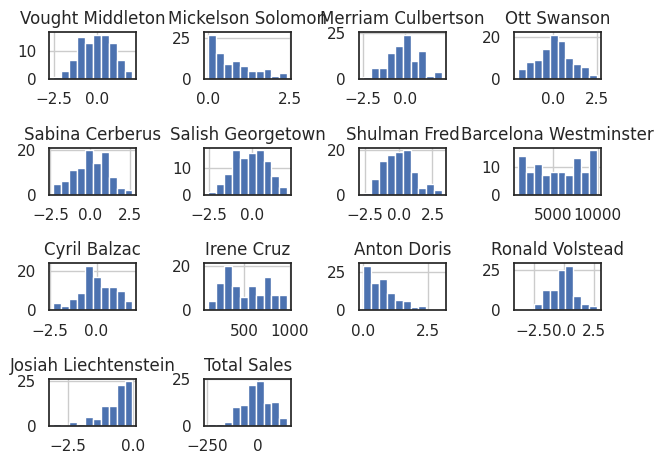

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

AssignDf.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
AssignDf.isnull().sum()

Vought Middleton          6
Mickelson Solomon         7
Merriam Culbertson        0
Ott Swanson               0
Sabina Cerberus           0
Salish Georgetown         0
Shulman Fred              0
Barcelona Westminster     0
Cyril Balzac              0
Irene Cruz                0
Anton Doris               3
Ronald Volstead           0
Josiah Liechtenstein     17
Collar                    0
401K                      0
Medical                   0
Stars                     0
Total Sales               0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical
AssignDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 105
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vought Middleton       94 non-null     float64
 1   Mickelson Solomon      93 non-null     float64
 2   Merriam Culbertson     100 non-null    float64
 3   Ott Swanson            100 non-null    float64
 4   Sabina Cerberus        100 non-null    float64
 5   Salish Georgetown      100 non-null    float64
 6   Shulman Fred           100 non-null    float64
 7   Barcelona Westminster  100 non-null    int64  
 8   Cyril Balzac           100 non-null    float64
 9   Irene Cruz             100 non-null    int64  
 10  Anton Doris            97 non-null     float64
 11  Ronald Volstead        100 non-null    float64
 12  Josiah Liechtenstein   83 non-null     float64
 13  Collar                 100 non-null    object 
 14  401K                   100 non-null    object 
 15  Medica

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.01-Interpolation-Problem-Statement.html
# https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

AssignDf['Vought Middleton'].fillna(round(AssignDf['Vought Middleton'].mean(), 2), inplace=True)
AssignDf['Mickelson Solomon'].fillna(round(AssignDf['Mickelson Solomon'].mean(), 2), inplace=True)
AssignDf['Anton Doris'].fillna(round(AssignDf['Anton Doris'].mean(), 2), inplace=True)
AssignDf['Josiah Liechtenstein'].fillna(AssignDf['Josiah Liechtenstein'].median(), inplace=True)
AssignDf.isnull().sum()

Vought Middleton         0
Mickelson Solomon        0
Merriam Culbertson       0
Ott Swanson              0
Sabina Cerberus          0
Salish Georgetown        0
Shulman Fred             0
Barcelona Westminster    0
Cyril Balzac             0
Irene Cruz               0
Anton Doris              0
Ronald Volstead          0
Josiah Liechtenstein     0
Collar                   0
401K                     0
Medical                  0
Stars                    0
Total Sales              0
dtype: int64

In [ ]:
# show null values for each variable
AssignDf.isnull().sum()

Vought Middleton         0
Mickelson Solomon        0
Merriam Culbertson       0
Ott Swanson              0
Sabina Cerberus          0
Salish Georgetown        0
Shulman Fred             0
Barcelona Westminster    0
Cyril Balzac             0
Irene Cruz               0
Anton Doris              0
Ronald Volstead          0
Josiah Liechtenstein     0
Collar                   0
401K                     0
Medical                  0
Stars                    0
Total Sales              0
dtype: int64

In [ ]:
# show null values for each variable
AssignDf.isnull().sum()

Vought Middleton         0
Mickelson Solomon        0
Merriam Culbertson       0
Ott Swanson              0
Sabina Cerberus          0
Salish Georgetown        0
Shulman Fred             0
Barcelona Westminster    0
Cyril Balzac             0
Irene Cruz               0
Anton Doris              0
Ronald Volstead          0
Josiah Liechtenstein     0
Collar                   0
401K                     0
Medical                  0
Stars                    0
Total Sales              0
dtype: int64

### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

In [ ]:
# train test split (Total Sales is the dependent (y) variable), print the shapes for X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Total Sales",axis=1),
                                                 df["Total Sales"],
                                                 test_size = 0.25,
                                                 random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 20)
(27, 20)
(79,)
(27,)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe df
X_train.describe()

,Merriam Culbertson,Ott Swanson,Sabina Cerberus,Salish Georgetown,Shulman Fred,Buddhism Arcturus,Barcelona Westminster,Cyril Balzac,Irene Cruz,Salem Emil,Ronald Volstead
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000
mean,-0.045347,0.076401,-0.088523,-0.082241,-0.016288,-0.088523,5742.151899,0.064029,528.405063,7.000000e-02,-0.091923
std,0.974381,1.008226,1.032290,0.960526,1.189145,1.032290,2802.606429,0.919515,230.266430,2.793293e-17,1.085297
min,-2.494389,-2.029898,-2.260700,-2.514647,-2.630110,-2.260700,1059.000000,-2.299699,112.000000,7.000000e-02,-3.788922
25%,-0.686463,-0.526661,-0.856900,-0.793127,-1.004785,-0.856900,3265.000000,-0.471222,313.000000,7.000000e-02,-0.943182
50%,-0.073048,-0.014392,-0.017800,-0.068778,-0.071571,-0.017800,5968.000000,-0.051609,550.000000,7.000000e-02,0.129003
75%,0.598411,0.640841,0.684250,0.631281,0.753170,0.684250,8138.500000,0.733528,734.500000,7.000000e-02,0.524561
max,2.210145,2.508011,2.635200,2.025205,3.217716,2.635200,9941.000000,1.915229,973.000000,7.000000e-02,2.784872


Using X_train.describe(), identified Lowe Angles and Oslo Madame are the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
from sklearn.preprocessing import StandardScaler

column_scales = ['Barcelona Westminster','Irene Cruz']
df['Barcelona Westminster'] = (df['Barcelona Westminster'] - df['Barcelona Westminster'].mean()) / df['Barcelona Westminster'].std()
print('The standardization for column Barcelona Westminster is: ',df['Barcelona Westminster'].max())
df['Irene Cruz'] = (df['Irene Cruz'] - df['Irene Cruz'].mean()) / df['Irene Cruz'].std()
print('The standardization for column Irene Cruz is: ',df['Irene Cruz'].max())



The standardization for column Barcelona Westminster is:  1.5326531645411954
The standardization for column Irene Cruz is:  1.8698090108276184


In [ ]:
# normalize feature
numeric_columns = X_train.select_dtypes(include=['number'])

X_train = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())

X_train



,Merriam Culbertson,Ott Swanson,Sabina Cerberus,Salish Georgetown,Shulman Fred,Buddhism Arcturus,Barcelona Westminster,Cyril Balzac,Irene Cruz,Salem Emil,Ronald Volstead
73,0.651876,0.671685,0.245716,0.378019,0.394800,0.245716,0.746679,0.875696,0.636469,NaN,0.401606
15,0.385336,0.098919,0.305950,0.386736,0.274031,0.305950,0.130038,0.662245,0.786295,NaN,0.578033
77,0.432974,0.569849,0.712249,0.531076,0.281843,0.712249,0.397771,0.896831,0.461092,NaN,0.702444
36,0.423301,0.058163,0.550787,0.610761,0.373184,0.550787,0.937401,0.330601,0.155633,NaN,0.371104
88,0.710967,0.485701,0.873813,0.644150,0.194362,0.873813,0.705021,0.449306,0.749129,NaN,0.359489
...,...,...,...,...,...,...,...,...,...,...,...
71,0.642003,0.474955,0.493883,0.858736,0.262892,0.493883,0.552691,0.847401,0.836237,NaN,0.685940
14,0.311612,0.000000,0.484221,0.768791,0.614442,0.484221,0.981761,0.373242,0.774681,NaN,0.626994
92,0.479560,0.500021,0.539962,1.000000,0.813309,0.539962,0.303085,0.534959,0.673635,NaN,0.850267
51,0.726821,0.601140,0.375886,0.173034,0.624815,0.375886,0.075546,0.486403,0.378630,NaN,0.391012


In [ ]:
# describe data again to verify transformations
X_train.describe()


,Merriam Culbertson,Ott Swanson,Sabina Cerberus,Salish Georgetown,Shulman Fred,Buddhism Arcturus,Barcelona Westminster,Cyril Balzac,Irene Cruz,Salem Emil,Ronald Volstead
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,0.0,79.000000
mean,0.520571,0.464156,0.443673,0.535790,0.446973,0.443673,0.527263,0.560799,0.483630,NaN,0.562384
std,0.207115,0.222179,0.210848,0.211577,0.203348,0.210848,0.315538,0.218157,0.267441,NaN,0.165094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.384294,0.331262,0.286730,0.379202,0.277937,0.286730,0.248367,0.433810,0.233449,NaN,0.432892
50%,0.514683,0.444149,0.458118,0.538755,0.437520,0.458118,0.552691,0.533364,0.508711,NaN,0.595992
75%,0.657408,0.588540,0.601514,0.692958,0.578554,0.601514,0.797061,0.719639,0.722997,NaN,0.656163
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [ ]:
# df.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 73 to 102
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Merriam Culbertson     79 non-null     float64
 1   Ott Swanson            79 non-null     float64
 2   Sabina Cerberus        79 non-null     float64
 3   Salish Georgetown      79 non-null     float64
 4   Shulman Fred           79 non-null     float64
 5   Buddhism Arcturus      79 non-null     float64
 6   Barcelona Westminster  79 non-null     float64
 7   Cyril Balzac           79 non-null     float64
 8   Irene Cruz             79 non-null     float64
 9   Salem Emil             0 non-null      float64
 10  Ronald Volstead        79 non-null     float64
dtypes: float64(11)
memory usage: 7.4 KB


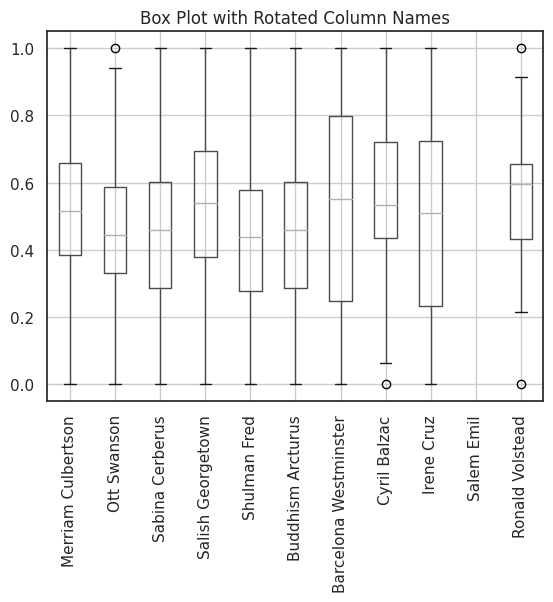

In [ ]:
# check for outliers
X_train.boxplot()
plt.xticks(rotation=90)  # Rotate the column names by 90 degrees
plt.title('Box Plot with Rotated Column Names')
plt.show()

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort vif_data by VIF score in descending order
vif_data_sorted = vif.sort_values(by='VIF', ascending=False)

# Print the sorted DataFrame
print(vif_data_sorted)

                 Variable       VIF
3         Sabina Cerberus       inf
6       Buddhism Arcturus       inf
12            Total Sales  1.937390
8            Cyril Balzac  1.522296
11        Ronald Volstead  1.395828
9              Irene Cruz  1.162481
2             Ott Swanson  1.141416
1      Merriam Culbertson  1.120916
4       Salish Georgetown  1.120388
7   Barcelona Westminster  1.072488
5            Shulman Fred  1.053390
10             Salem Emil  0.090773
0                   const  0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
df = df.drop(columns=['Buddhism Arcturus'])

In [ ]:
# verify you no longer have multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

MissingDataError: ignored

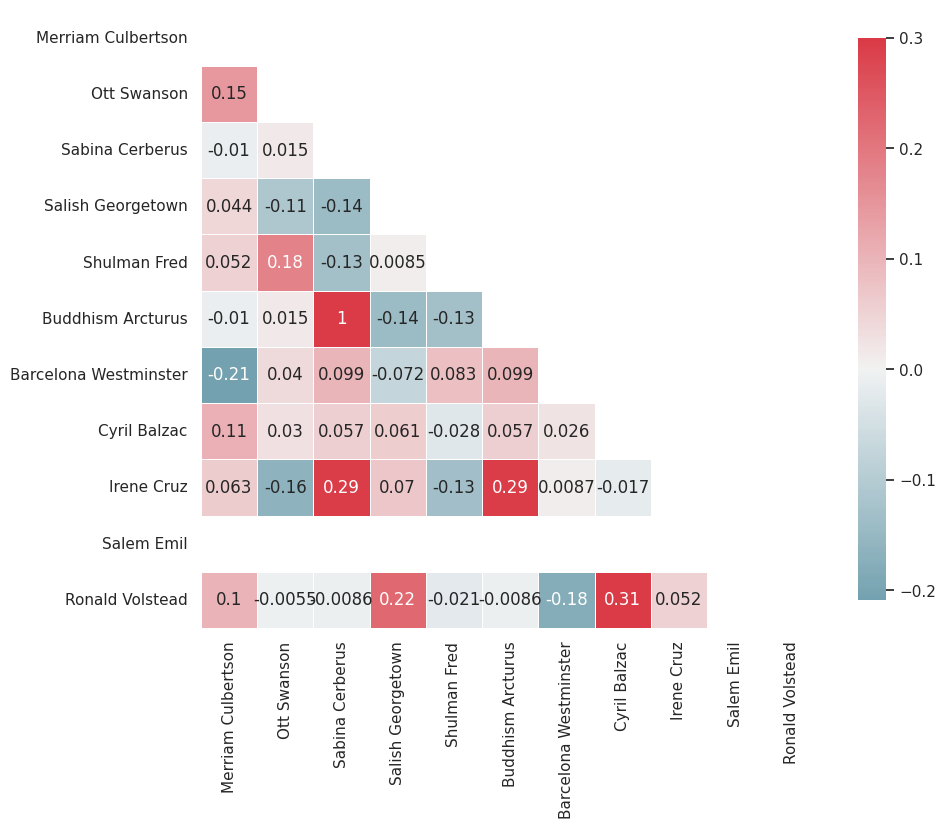

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr  = X_train.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

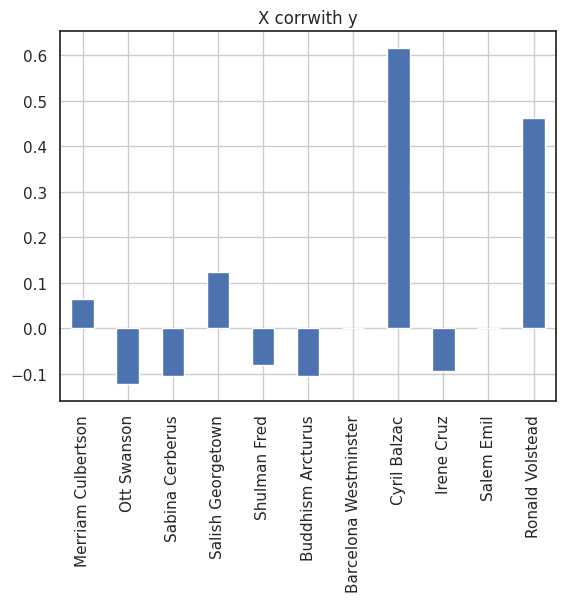

In [ ]:
# correlation with target
X_train.corrwith(y_train).plot.bar(title='X corrwith y', rot=90,grid=True);

In [ ]:
cols = ['Salem Emil']
X_test.drop(cols,axis = 1,inplace = True)

In [ ]:
X_test.shape

(27, 19)

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = X_train._get_numeric_data()
y = y_train._get_numeric_data()
x_tes = X_test._get_numeric_data()
model = LinearRegression()
model.fit(x,y)

yhat = model.predict(x_tes)
print("MSE:",mean_squared_error(y_test,yhat))
print("RSQUARE:",r2_score(y_test,yhat))


ValueError: ignored

In [ ]:
# create an OLS model from statsmodels and print the summary
import statsmodels.api as sm
# x_train.insert(0, 'const',1)
model = sm.OLS(y ,x).fit()
model.summary()

MissingDataError: ignored

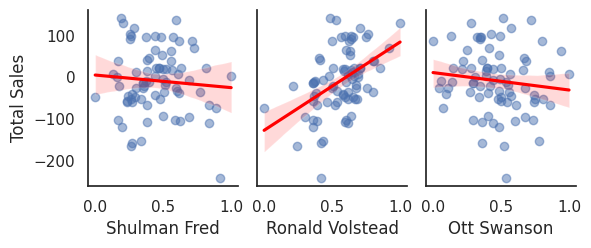

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals
import pandas as pd
import seaborn as sns
sns.pairplot(data=pd.concat([X_train, y_train],axis=1),
                               x_vars=['Shulman Fred','Ronald Volstead','Ott Swanson'],y_vars = 'Total Sales',
                               kind = 'reg',
                               aspect=0.8,
                               plot_kws ={'line_kws':{'color':'red'},
                                          'scatter_kws':{'alpha':0.5}}
                            );

### Extra Credit

For extra credit, take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
# code here


### Summary

Share some thoughts on what you have discovered during this analysis

I began working on the analysis by first performing data cleaning and data exploration on the dataset containing employee ratings for months of review cycles.